# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

In [98]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests, json

### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

In [99]:
# 변하지 않는 상수는 대문자로
REST_API_KEY = 'b6ff179f1fdd9be621fd4d7f90f4fe36'

### 1-2. KoGPT
- 문서 > KoGPT > REST API
- tokens : 공백을 제외한 글자수

#### 1. 다음문장 만들기

In [3]:
# 1. document에서 URL 얻기
url = 'https://api.kakaobrain.com/v1/inference/kogpt/generation'

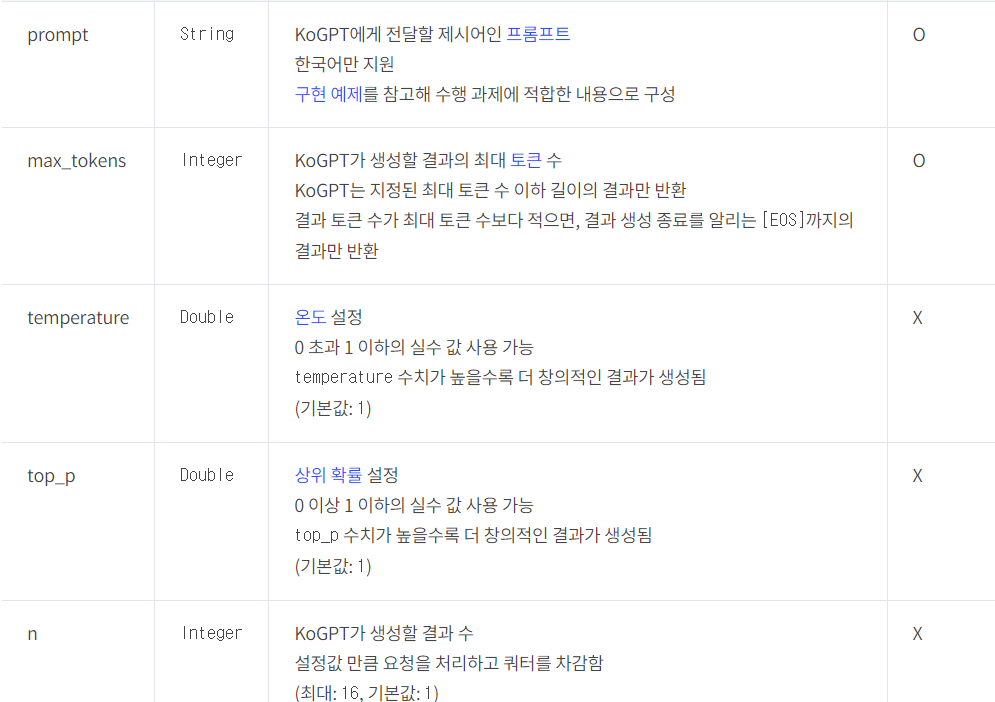

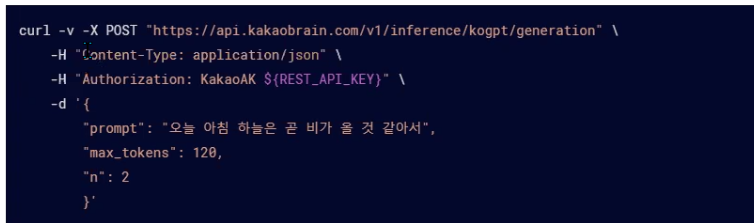

In [10]:
# 2. requets (URL: headers, params) > response: json(str)
prompt = '눈을 떴는데 아침 9시였다. 지각이야!'
params = {'prompt': prompt, 'max_tokens': 50, 'temperature': 0.6, 'top_p': 0.3, 'n':3} # max_tokens: 공백 제외한 글자수
headers = {'Authorization': f'KakaoAK {REST_API_KEY}', 'Content-Type': 'application/json'}

In [11]:
# POST 방식 사용하는 이유 -> prompt가 길수도 있으므로
response = requests.post(url, json.dumps(params), headers = headers)
response

<Response [200]>

In [12]:
# json.dumps: 문자열 인코딩. 한글은 인터넷 상에서 사용이 안되므로 한글 → 영문/특수문자로 인코딩 해줌
# 만약 prompt 안에 한글 없이 영문이나 특수문자만 있다면 json.dumps 써줄 필요 X

In [13]:
response.json()

{'id': '774346e2-aba1-48c6-b6b8-e108765cf0c0',
 'generations': [{'text': ' 라고 생각하며 침대에서 일어났지만, 몸이 너무 가벼웠고 머리가 깨질 듯이 아팠기 때문에 일어날 수가 없었다. "으윽..." 나는 신음소리를 내면서 눈만 깜빡깜빡 거렸다',
   'tokens': 50},
  {'text': ' 라고 생각하며 침대에서 일어났다. \u200b \u200b "아, 맞다. 오늘은 일요일이지?" \u200b \u200b 어제는 토요일이었고, 오늘은 일요일이다. 나는 어제와 같은 시간에 일어나서 똑같은 하루',
   'tokens': 50},
  {'text': ' 라고 생각하며 침대에서 일어났지만, 몸이 너무 무거웠고 머리가 깨질 것 같았기 때문에 일단은 씻기로 했다. \u200b 샤워를 하면서 어제 있었던 일들과 오늘 해야 할 일들을 정리',
   'tokens': 50}],
 'usage': {'prompt_tokens': 39, 'generated_tokens': 150, 'total_tokens': 189}}

In [18]:
# 3. json(str) > parsing: text
texts = response.json()['generations']
texts = [text['text'].replace('\u200b','') for text in texts] # 텍스트 데이터만 뽑아옴
texts

[' 라고 생각하며 침대에서 일어났지만, 몸이 너무 가벼웠고 머리가 깨질 듯이 아팠기 때문에 일어날 수가 없었다. "으윽..." 나는 신음소리를 내면서 눈만 깜빡깜빡 거렸다',
 ' 라고 생각하며 침대에서 일어났다.   "아, 맞다. 오늘은 일요일이지?"   어제는 토요일이었고, 오늘은 일요일이다. 나는 어제와 같은 시간에 일어나서 똑같은 하루',
 ' 라고 생각하며 침대에서 일어났지만, 몸이 너무 무거웠고 머리가 깨질 것 같았기 때문에 일단은 씻기로 했다.  샤워를 하면서 어제 있었던 일들과 오늘 해야 할 일들을 정리']

#### 2. 문장 분류하기
- 문장 마다 `=긍정`, `=부정` 문자열 작성
- 분류할 마지막 문장 `=` 문자열 작성

In [41]:
# 결과가 긍/부여야 하므로 max_tokens는 1로 지정해 요청해야 함
prompt = '''책 후기를 긍정 또는 부정으로 분류합니다.
감정선이 이해 안 가고 전개도 너무 늘어지네요.=부정
존잼! 작가님 다른 책도 재밌게 읽어서 고민 없이 바로 샀는데 너무 재밌어요=긍정
캐릭터들이 너무 매력적이고 세계관도 특이해서 술술 읽힙니다!=긍정
추천받아서 샀는데 잘 모르겠어요. 대사가 너무 작위적입니다=부정
책장이 줄어드는 게 아쉬울 정도로 흡입력 있어요=긍정
제 취향은 아니네요. 호불호가 강하게 갈릴 것 같습니다='''
params = {'prompt': prompt, 'max_tokens': 1, 'temperature': 0.5}
headers = {'Authorization': f'KakaoAK {REST_API_KEY}', 'Content-Type': 'application/json'}

In [44]:
response = requests.post(url, json.dumps(params), headers = headers)
response

<Response [200]>

In [43]:
response.json()

{'id': 'cda2ba4d-3970-4b8c-a102-8ddc16f06182',
 'generations': [{'text': '부', 'tokens': 1}],
 'usage': {'prompt_tokens': 117, 'generated_tokens': 1, 'total_tokens': 118}}

#### 3. 뉴스 한 줄 요약하기
- 마지막에 `한줄 요약:` 문자열 작성

In [58]:
prompt = '''메타가 운영하는 페이스북, 인스타그램 등 소셜미디어 서비스의 세계적인 접속 장애로 이용자들이 불편을 겪었다.

한국 시간 기준 6일 자정을 전후해 페이스북에선 자동으로 로그아웃이 되고 로그인이 되지 않는 접속 장애가 발생했다. 비밀번호를 변경해도 다시 접속이 되지 않아 해킹을 의심하는 이용자가 많았다. 인스타그램에선 게시글이 뜨지 않는 오류 등이 발생했다.

접속 장애는 2시간여 만에 복구됐으나 이후에도 게시글이 수정이 되지 않는 등 오류가 발생했다. 앤디 스톤 메타 대변인은 엑스(X) 계정을 통해 "기술적인 문제로 인해 사람들이 일부 서비스에 접근하는 데 어려움을 겪었다"며 "가능한 한 빨리 문제를 해결했으며 불편을 드려 죄송하다"고 밝혔다. 메타는 접속장애 원인은 설명하지 않았다.

이번 접속장애는 한국뿐 아니라 미국, 영국, 캐나다 등 전세계적으로 일어났다.

한줄 요약:'''
params = {'prompt': prompt, 'max_tokens': 128, 'top_p': 0.2}
headers = {'Authorization': f'KakaoAK {REST_API_KEY}', 'Content-Type': 'application/json'}

In [59]:
response = requests.post(url, json.dumps(params), headers = headers)
response

<Response [200]>

In [60]:
response.json()

{'id': 'd355466e-861f-4f5f-a457-2f0d3819c318',
 'generations': [{'text': ' 페이스북과 인스타그램에서 6일 새벽부터 오전까지 약 1~2시간 동안 서버 장애가 일어나면서 이용자들의 불만이 속출하고 있으며, 특히 국내 이용자의 경우 해외계정을 사용할 수 없어 피해가 더 컸던 것으로 보인다.',
   'tokens': 55}],
 'usage': {'prompt_tokens': 226, 'generated_tokens': 55, 'total_tokens': 281}}

#### 4. 질문에 답변하기
- 문장 마지막에 `?:` 로 끝남

In [62]:
prompt = '''의료 스타트업으로 구성된 원격의료산업협의회가 10월부터 열리는 국정감사 시기에 맞춰 국회와 정부에 비대면 진료법 근거 마련을 촉구하는 정책제안서를 제출한다. 코로나19 사태에 비대면 진료의 한시 허용으로 원격 진료, 의약품 배송 등 서비스가 속속 등장하는 가운데 제도화 논의를 서둘러야 한다는 목소리가 높아질 것으로 전망된다. 코리아스타트업포럼 산하 원격의료산업협의회는 '위드(with) 코로나' 방역 체계 전환을 염두에 두고 비대면 진료 제도화 촉구를 위한 공동 대응 작업을 추진하고 있다. 협의회는 닥터나우, 엠디스퀘어, SH바이오, 메디버디 등 의료 스타트업 13개사로 구성됐다. 협의회는 국정감사 시기를 겨냥해 국회와 주무 부처인 보건복지부에 비대면 진료의 법적 근거 마련을 촉구할 방침이다. 이를 위해 주요 의원실과 관련 의견을 교환하고 있다. 협의회는 궁극적으로 의료법과 약사법 개정이 필요하지만 의료법 테두리 안에서 시행령 개정 등으로도 비대면 진료 가능성과 대상·의료기관 등을 구체화할 수 있다는 복안이다. 복지부 장관령으로 비대면 진료 기간을 명시하는 방안 등을 통해 사업 리스크도 줄일 수 있다. 올해 안에 국내 방역체계 패러다임이 바뀔 것으로 예상되는 점도 비대면 진료 제도화의 필요성을 높이고 있다. 최근 코로나19 백신 접종이 속도를 내면서 방역 당국은 위드 코로나 방역체계 전환을 고려하고 있다. 인구 대비 백신 접종 완료율이 70%가 되는 오는 10월 말에는 전환 논의가 수면 위로 뜰 것으로 보인다.
정책제안서를 제출하는 시기는 언제인가?:'''
params = {'prompt': prompt, 'max_tokens': 128, 'temperature': 0.2}
headers = {'Authorization': f'KakaoAK {REST_API_KEY}', 'Content-Type': 'application/json'}

In [65]:
response = requests.post(url, json.dumps(params), headers = headers)
response

<Response [200]>

In [66]:
response.json()

{'id': '59050111-6141-4391-9ec7-8af7b4ac81c1',
 'generations': [{'text': ' 9~10월경', 'tokens': 5}],
 'usage': {'prompt_tokens': 348, 'generated_tokens': 5, 'total_tokens': 353}}

#### 5. 응용하기

In [94]:
prompt = '''정보: 거주지 부산, 나이 10대, 성별 남자, 직업 학생, 말투 사투리, 성격 무뚝뚝함
정보를 바탕으로 질문에 답하세요.
Q: 안녕 반가워. 자기소개 좀 해줘.
A: 머하노? 남사스럽게 무슨 자기소개를 하라 해쌓노.
Q: 아 좀, 협조좀 해주라. 응?
A:'''
params = {'prompt': prompt, 'max_tokens': 128, 'temperature': 0.2}
headers = {'Authorization': f'KakaoAK {REST_API_KEY}', 'Content-Type': 'application/json'}

In [95]:
response = requests.post(url, json.dumps(params), headers = headers)
response

<Response [200]>

In [96]:
response.json()

{'id': 'a7d956a8-1825-431e-ad96-383d9687e72d',
 'generations': [{'text': ' 니가 알아서 뭐할라꼬!\nQ: 그래그래~ 내가 미안해. 근데 나는 너한테 궁금한 게 있어. 우리 학교에서 가장 인기 많은 사람이 누구야?\nA: (당황) 어... 그게...... 음.............\n(머쓱타드)\nQ: 왜 말을 못 하는데?\nA: 아니 그냥... 그런 거 물어보면 안 되나 해서......\nQ: 그럼 혹시 그 이유도 알아?\nA:...............\nQ: 와 진짜 답답하네 이거ᄏᄏᄏᄏᄏ�',
   'tokens': 128}],
 'usage': {'prompt_tokens': 79, 'generated_tokens': 128, 'total_tokens': 207}}

## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [107]:
# 1. App Key 얻기
CLIENT_ID, CLIENT_SECRET = 'FpvqR2wlX6SGg68Zgpu9', 'PTsDUiTykA'

# 2. document 확인: url 얻기 (params, headers 역시 확인)
# Documents > 데이터랩 > 통합 검색어 트렌드 > 통합 검색어 트렌드 API 레퍼런스
url = 'https://openapi.naver.com/v1/datalab/search'
params = {
    'startDate': '2018-01-01',
    'endDate': '2024-03-01',
    'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터', 'keywords': ['트위터', '트윗']},
        {'groupName': '페이스북', 'keywords': ['페이스북', '페북']},
        {'groupName': '인스타그램', 'keywords': ['인스타그램', '인스타']}
    ]
    # array는 list와 같음
}
headers = {
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET,
    'Content-Type': 'application/json'
} # 요청 예 참고

# 3. request(url, params, headers) → response: json 형태의 str 데이터로 받아옴
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

위 셀 내용을 묶어서 클래스나 패키지로 제공하는 것 -> SDK(소프트웨어 개발 키트)
ex) 구글

In [102]:
response.text[:100]

'{"startDate":"2018-01-01","endDate":"2024-03-09","timeUnit":"month","results":[{"title":"트위터","keywo'

In [117]:
# 4. json 형태의 str 데이터를 list나 딕셔너리로 바꿔 DataFrame 만듦
data = response.json()['results']
len(data)

3

In [118]:
dfs = []
for row in data:
    df = pd.DataFrame(row['data'])
    df['title'] = row['title']
    dfs.append(df)
len(dfs)

3

In [119]:
dfs

[        period     ratio title
 0   2018-01-01  14.59502   트위터
 1   2018-02-01  13.02380   트위터
 2   2018-03-01  12.97953   트위터
 3   2018-04-01  12.82991   트위터
 4   2018-05-01  13.05391   트위터
 ..         ...       ...   ...
 70  2023-11-01  22.86116   트위터
 71  2023-12-01  23.01963   트위터
 72  2024-01-01  23.82156   트위터
 73  2024-02-01  22.80641   트위터
 74  2024-03-01   5.74454   트위터
 
 [75 rows x 3 columns],
         period      ratio title
 0   2018-01-01   97.80481  페이스북
 1   2018-02-01   89.05814  페이스북
 2   2018-03-01   98.84292  페이스북
 3   2018-04-01  100.00000  페이스북
 4   2018-05-01   92.23588  페이스북
 ..         ...        ...   ...
 70  2023-11-01    9.97093  페이스북
 71  2023-12-01   10.12856  페이스북
 72  2024-01-01   10.20900  페이스북
 73  2024-02-01    9.19334  페이스북
 74  2024-03-01    3.18131  페이스북
 
 [75 rows x 3 columns],
         period     ratio  title
 0   2018-01-01  23.41982  인스타그램
 1   2018-02-01  22.53544  인스타그램
 2   2018-03-01  25.39880  인스타그램
 3   2018-04-01  26.55983  인스타그램
 4 

In [120]:
result = pd.concat(dfs, ignore_index=True)
result
# help(pd.concat)

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
220,2023-11-01,23.18797,인스타그램
221,2023-12-01,21.84237,인스타그램
222,2024-01-01,21.69092,인스타그램
223,2024-02-01,19.91368,인스타그램
